100%|██████████████████████████████████████████████████████████████████████████████████| 43/43 [01:08<00:00,  1.59s/it]

(73139, 2)
[[array([[[52, 55, 59],
        [53, 56, 60],
        [54, 57, 61],
        ...,
        [53, 50, 59],
        [53, 50, 59],
        [54, 51, 60]],

       [[52, 55, 59],
        [52, 55, 59],
        [53, 56, 60],
        ...,
        [55, 52, 61],
        [55, 52, 61],
        [55, 52, 61]],

       [[53, 56, 60],
        [52, 55, 59],
        [52, 55, 60],
        ...,
        [54, 53, 63],
        [54, 53, 63],
        [54, 53, 63]],

       ...,

       [[55, 53, 65],
        [56, 54, 66],
        [57, 55, 67],
        ...,
        [50, 53, 61],
        [47, 53, 58],
        [47, 53, 58]],

       [[56, 52, 64],
        [58, 54, 66],
        [57, 55, 67],
        ...,
        [49, 55, 62],
        [47, 53, 58],
        [47, 53, 58]],

       [[55, 51, 63],
        [57, 53, 65],
        [57, 55, 67],
        ...,
        [50, 56, 63],
        [47, 53, 58],
        [46, 52, 57]]], dtype=uint8)
  0]
 [array([[[43, 35, 46],
        [47, 39, 50],
        [47, 41, 52],
      


<ipython-input-12-4afcc7ac5330>:78: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  data_set = np.array(data_set)


ValueError: x and y can be no greater than 2-D, but have shapes (32,) and (32, 32, 3)

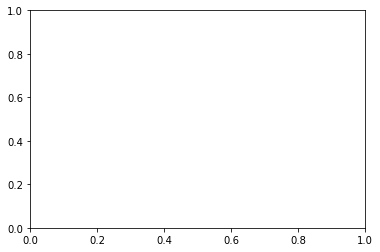

In [12]:
import cv2
import numpy as np
import glob
import random
from tqdm import tqdm
import os
import matplotlib.pyplot as plt

# data_gen 코드 모듈을 제일 먼저 작성한다.

# def cv_show_text(img, label):  # image에 텍스트를 띄우는 함수
#     font = cv2.FONT_HERSHEY_SIMPLEX  # 폰트 정의 해주고
#     color = (255, 255, 255)  # 색도 정하고
#     location = (10, 10)  # 위치도 정한다.
#     cv2.putText(img, label, location, font, 0.5, color, 2, cv2.LINE_AA)
#     color = (0, 0, 0)  # 이렇게 검은색을 약간 작게 해주면 글씨가 더 잘 보인다.
#     cv2.putText(img, label, location, font, 0.5, color, 1, cv2.LINE_AA)
#     cv2.imshow("wow", img)  # 이미지를 보여준다.
#     cv2.waitKey(0)


def traffic_data_gen(data_path, model_size):  # 포켓몬 데이터의 위치를 받고 모델사이즈를 받아서 모델에 넣을 데이터 생성

    label = 0
    data_set = []
    traffic_dict = []
    save_flag = 0
    count = 0

    train_data_path = "dada/trafficdata/train/"
    test_data_path = "dada/trafficdata/test/"
    traffic_name_txt = "traffic_name.txt"  # 나중에 파일 라벨 확인할 txt 문서 만들어 둔 것.(편의상)

    if not os.path.isdir(train_data_path):  # 해당 디렉토리에 없다면 만들어라
        os.makedirs(train_data_path)
    if not os.path.isdir(test_data_path):
        os.makedirs(test_data_path)

    if len(glob.glob(train_data_path + "*.jpg")) > 10:  # 훈련 데이터 경로의 이미지가 10개를 초과하면 save_flag= 1
        save_flag = 1  # 즉 이미 있으니 저장 안한다는 말. 읽어오기만 해도 된다.

    # 데이터가 없다면
    # 훈련 데이터 경로에 이미지가 없다면( 9개 이하라면)
    if save_flag == 0:

        fld_list = glob.glob(data_path + '/*')  # 폴더의 리스트를 가져온다. 포켓몬 데이터 경로의 모든 폴더들
        for i in tqdm(fld_list):  # 여기서 i는 폴더리스트에 있는 요소 하나다. 즉 폴더 하나가 포켓몬 이름 하나다.
            img_list = i + '/*.jpg'  # img_list는 폴더리스트에 들어간 이미지들의 리스트경로를 가져오게 하는  값 설정
            img_list = glob.glob(img_list)  # 해당 리스트들을 모두 파일로 가져온다.
            for j in img_list:  # j는 폴더안의 이미지 하나 하나
                img = cv2.imread(j)  # 이미지를 읽어서
                img = cv2.resize(img, (model_size, model_size))  # resize해주고
                traffic_name = i.replace('d:/다운로드/traffic_signs_classification/myData\\', '')   # 폴더명별로 되어있는 포켓몬 이름만 남김.
                data_set.append([img, label])  # 이미지와 그에따른 라벨을 데이터셋에 추가한다.
            traffic_dict.append(traffic_name)  # 포켓몬 사전에는 j의 포문 후 포켓몬 이름을 추가한다.
            label += 1
#                 img_list 포문이 돌때마다 포켓몬별 폴더의 이미지를 읽어서 라벨링해준다.
#                     그에 맞는 포켓몬 이름도 포켓몬 사전에 추가된다.


        with open(traffic_name_txt, 'w') as txt:
            for n in traffic_dict:  # 포켓몬 사전에 적힌 이름들( 폴더명) 개수 만큼 돌면서
                txt.writelines(str(n))  # txt파일에 이름을 쭉 write한다.
                txt.writelines(" ")  # 한칸씩 띄어쓰면서


#         tmp_dataset = [[x,y] for x, y in zip(data_set[0], data_set[1])]
#         random.shuffle(tmp_dataset)
#         # ran_img = [n[0] for n in tmp_dataset]
#         # ran_label = [n[1] for n in tmp_dataset]
#         data_set = tmp_dataset
        indexer = int(len(data_set) * 0.8)  # 훈련/시험 데이터 나누는 비율

        x_train = []
        y_train = []
        x_test = []
        y_test = []
        data_set = np.array(data_set)
        print(data_set.shape)
        print(data_set[:4])
        
        plt.plot(data_set[0][0])
        plt.show()
        random.shuffle(data_set)  # 전체 데이터 섞어줌
        
        print(data_set[:4])
        
#         count = 0
#         for i in tqdm(range(0, indexer)):  # 훈련데이터
#             x_train.append(data_set[i][0])
#             y_train.append(data_set[i][1])  # 위에서 [img, label]로 append해서 이렇게 [i][0] , [i][1]

#             save_img_path = train_data_path + "%d.jpg" % count  # 이미지 경로
#             save_label_file = train_data_path + "%d.txt" % count  # 라벨(텍스트) 경로

#             cv2.imwrite(save_img_path, data_set[i][0])  # 이미지 저장
#             with open(save_label_file, 'w') as txt:  # 텍스트 저장 라벨링 한 숫자에 맞아떨어지게
#                 txt.writelines(str(data_set[i][1]))
#             count += 1

#         count = 0  # 시험 데이터도 돌려야 해서 local변수 선언 해준 것이다. 위의 count와 영향 없게
#         for i in tqdm(range(indexer, len(data_set))):
#             x_test.append(data_set[i][0])
#             y_test.append(data_set[i][1])

#             save_img_path = test_data_path + "%d.jpg" % count  # 이미지 경로
#             save_label_file = test_data_path + "%d.txt" % count  # 라벨(텍스트) 경로

#             cv2.imwrite(save_img_path, data_set[i][0])  # 이미지 저장

#             with open(save_label_file, 'w') as txt:  # 텍스트 저장
#                 txt.writelines(str(data_set[i][1]))
#             count += 1

#         return x_train, y_train, x_test, y_test, traffic_dict

#     elif save_flag == 1:  # 이미 파일이 준비되어 있는 경우

#         x_train = []
#         y_train = []
#         x_test = []
#         y_test = []

#         train_data_list = glob.glob(train_data_path + "*.jpg")  # 데이터가 이미 존재하니까. 이미지 불러옴
#         test_data_list = glob.glob(test_data_path + "*.jpg")


#         for i in tqdm(range(0, len(train_data_list))):  # 이미지 하나하나 for문돌리면서
#             file = train_data_list[i]  # i번째 이미지
#             img = cv2.imread(file)  # 읽고
#             label_path = file.replace(".jpg", ".txt")  # 라벨 데이터 읽기 위해 path만듬
#             with open(label_path, 'r') as txt:  # 라벨 데이터 txt안에서 라벨 읽어옴
#                 label = txt.readlines()
#             label = int(label[0])  # 각 이미지 별 라벨 값을 얻는다.
#             x_train.append(img)  # 이미지는 x에
#             y_train.append(label)  # 라벨은 y에 넣는다
#         # 테스트 데이터도 마찬가지
#         for i in tqdm(range(0, len(test_data_list))):
#             file = test_data_list[i]
#             img = cv2.imread(file)
#             label_path = file.replace(".jpg", ".txt")
#             with open(label_path, 'r') as txt:
#                 label = txt.readlines()
#             label = int(label[0])
#             x_test.append(img)
#             y_test.append(label)
#         # 포켓몬 네임을 불러오기 위해 만들어둔 딕셔너리에서 찾아오는 방법
#         with open(traffic_name_txt, 'r') as txt:
#             label = txt.readlines()
#             traffic_dict = label[0].split(" ")  # 만든 파일이 모두 띄어쓰기로 이루어진것

#         return x_train, y_train, x_test, y_test, traffic_dict

if __name__ == "__main__":
    data_path = "d:/다운로드/traffic_signs_classification/myData/"
    model_size = 32
    x_train, y_train, x_test, y_test, traffic_dict = traffic_data_gen(data_path, model_size)

# for i in range(0,len(x_train)):
#     img = x_train[i]
#     pokemon_name = str(y_train[i])
#     cv_show_text(img,pokemon_name)

In [3]:
import cv2
import numpy as np
import glob
import random
from tqdm import tqdm
import os


# data_gen 코드 모듈을 제일 먼저 작성한다.

# def cv_show_text(img, label):  # image에 텍스트를 띄우는 함수
#     font = cv2.FONT_HERSHEY_SIMPLEX  # 폰트 정의 해주고
#     color = (255, 255, 255)  # 색도 정하고
#     location = (10, 10)  # 위치도 정한다.
#     cv2.putText(img, label, location, font, 0.5, color, 2, cv2.LINE_AA)
#     color = (0, 0, 0)  # 이렇게 검은색을 약간 작게 해주면 글씨가 더 잘 보인다.
#     cv2.putText(img, label, location, font, 0.5, color, 1, cv2.LINE_AA)
#     cv2.imshow("wow", img)  # 이미지를 보여준다.
#     cv2.waitKey(0)


def traffic_data_gen(data_path, model_size):  # 포켓몬 데이터의 위치를 받고 모델사이즈를 받아서 모델에 넣을 데이터 생성

    label = 0
    data_set = []
    traffic_dict = []
    save_flag = 0
    count = 0

    train_data_path = "./trial3/trafficdata/train/"
    test_data_path = "./trial3/trafficdata/test/"
    traffic_name_txt = "traffic_name_trial3.txt"  # 나중에 파일 라벨 확인할 txt 문서 만들어 둔 것.(편의상)

    if not os.path.isdir(train_data_path):  # 해당 디렉토리에 없다면 만들어라
        os.makedirs(train_data_path)
    if not os.path.isdir(test_data_path):
        os.makedirs(test_data_path)

    if len(glob.glob(train_data_path + "*.jpg")) > 10:  # 훈련 데이터 경로의 이미지가 10개를 초과하면 save_flag= 1
        save_flag = 1  # 즉 이미 있으니 저장 안한다는 말. 읽어오기만 해도 된다.

    # 데이터가 없다면
    # 훈련 데이터 경로에 이미지가 없다면( 9개 이하라면)
    if save_flag == 0:

        fld_list = glob.glob(data_path + '/*')  # 폴더의 리스트를 가져온다. 포켓몬 데이터 경로의 모든 폴더들
        for i in tqdm(fld_list):  # 여기서 i는 폴더리스트에 있는 요소 하나다. 즉 폴더 하나가 포켓몬 이름 하나다.
            img_list = i + '/*.jpg'  # img_list는 폴더리스트에 들어간 이미지들의 리스트경로를 가져오게 하는  값 설정
            img_list = glob.glob(img_list)  # 해당 리스트들을 모두 파일로 가져온다.
            for j in img_list[:5]:  # j는 폴더안의 이미지 하나 하나
                img = cv2.imread(j)  # 이미지를 읽어서
                # img = cv2.resize(img, (model_size, model_size))  # resize해주고
                traffic_name = i.replace('d:/다운로드/traffic_signs_classification/myData\\', '~~')   # 폴더명별로 되어있는 포켓몬 이름만 남김.
                data_set.append([img, label])  # 이미지와 그에따른 라벨을 데이터셋에 추가한다.
            traffic_dict.append(traffic_name)  # 포켓몬 사전에는 j의 포문 후 포켓몬 이름을 추가한다.
            label += 1
#                 img_list 포문이 돌때마다 포켓몬별 폴더의 이미지를 읽어서 라벨링해준다.
#                     그에 맞는 포켓몬 이름도 포켓몬 사전에 추가된다.


        with open(traffic_name_txt, 'w') as txt:
            for n in traffic_dict:  # 포켓몬 사전에 적힌 이름들( 폴더명) 개수 만큼 돌면서
                txt.writelines(str(n))  # txt파일에 이름을 쭉 write한다.
                txt.writelines(" ")  # 한칸씩 띄어쓰면서


#         tmp_dataset = [[x,y] for x, y in zip(data_set[0], data_set[1])]
#         random.shuffle(tmp_dataset)
        # ran_img = [n[0] for n in tmp_dataset]
        # ran_label = [n[1] for n in tmp_dataset]
#         data_set = tmp_dataset
        indexer = int(len(data_set) * 0.8)  # 훈련/시험 데이터 나누는 비율

        x_train = []
        y_train = []
        x_test = []
        y_test = []

#         random.shuffle(data_set)  # 전체 데이터 섞어줌

        count = 0
        for i in tqdm(range(0, indexer)):  # 훈련데이터
            x_train.append(data_set[i][0])
            y_train.append(data_set[i][1])  # 위에서 [img, label]로 append해서 이렇게 [i][0] , [i][1]

            save_img_path = train_data_path + "%d.jpg" % count  # 이미지 경로
            save_label_file = train_data_path + "%d.txt" % count  # 라벨(텍스트) 경로

            cv2.imwrite(save_img_path, data_set[i][0])  # 이미지 저장
            with open(save_label_file, 'w') as txt:  # 텍스트 저장 라벨링 한 숫자에 맞아떨어지게
                txt.writelines(str(data_set[i][1]))
            count += 1

        count = 0  # 시험 데이터도 돌려야 해서 local변수 선언 해준 것이다. 위의 count와 영향 없게
        for i in tqdm(range(indexer, len(data_set))):
            x_test.append(data_set[i][0])
            y_test.append(data_set[i][1])

            save_img_path = test_data_path + "%d.jpg" % count  # 이미지 경로
            save_label_file = test_data_path + "%d.txt" % count  # 라벨(텍스트) 경로

            cv2.imwrite(save_img_path, data_set[i][0])  # 이미지 저장

            with open(save_label_file, 'w') as txt:  # 텍스트 저장
                txt.writelines(str(data_set[i][1]))
            count += 1

        return x_train, y_train, x_test, y_test, traffic_dict

    elif save_flag == 1:  # 이미 파일이 준비되어 있는 경우

        x_train = []
        y_train = []
        x_test = []
        y_test = []

        train_data_list = glob.glob(train_data_path + "*.jpg")  # 데이터가 이미 존재하니까. 이미지 불러옴
        test_data_list = glob.glob(test_data_path + "*.jpg")


        for i in tqdm(range(0, len(train_data_list))):  # 이미지 하나하나 for문돌리면서
            file = train_data_list[i]  # i번째 이미지
            img = cv2.imread(file)  # 읽고
            label_path = file.replace(".jpg", ".txt")  # 라벨 데이터 읽기 위해 path만듬
            with open(label_path, 'r') as txt:  # 라벨 데이터 txt안에서 라벨 읽어옴
                label = txt.readlines()
            label = int(label[0])  # 각 이미지 별 라벨 값을 얻는다.
            x_train.append(img)  # 이미지는 x에
            y_train.append(label)  # 라벨은 y에 넣는다
        # 테스트 데이터도 마찬가지
        for i in tqdm(range(0, len(test_data_list))):
            file = test_data_list[i]
            img = cv2.imread(file)
            label_path = file.replace(".jpg", ".txt")
            with open(label_path, 'r') as txt:
                label = txt.readlines()
            label = int(label[0])
            x_test.append(img)
            y_test.append(label)
        # 포켓몬 네임을 불러오기 위해 만들어둔 딕셔너리에서 찾아오는 방법
        with open(traffic_name_txt, 'r') as txt:
            label = txt.readlines()
            traffic_dict = label[0].split(" ")  # 만든 파일이 모두 띄어쓰기로 이루어진것

        return x_train, y_train, x_test, y_test, traffic_dict

if __name__ == "__main__":
    data_path = "d:/다운로드/traffic_signs_classification/myData/"
    model_size = 32
    x_train, y_train, x_test, y_test, traffic_dict = traffic_data_gen(data_path, model_size)

# for i in range(0,len(x_train)):
#     img = x_train[i]
#     pokemon_name = str(y_train[i])
#     cv_show_text(img,pokemon_name)

100%|██████████████████████████████████████████████████████████████████████████████████| 43/43 [00:00<00:00, 66.49it/s]


# one hot encoding


In [4]:
from tensorflow.keras.utils import to_categorical

In [5]:
to_categorical(1, 5)

array([0., 1., 0., 0., 0.], dtype=float32)

In [6]:
label_onehot = to_categorical(label, num_classes=10)
label_onehot

NameError: name 'label' is not defined

In [ ]:
plt.title(label_onehot)
plt.imshow(train_x[0], 'gray')
plt.show()